# Analysis of Charlottesville Housing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m-%dT%H:%M:%S.%fZ")
sales = pd.read_csv('Real_Estate_Sales.csv', parse_dates=['SaleDate'], index_col = ["SaleDate"], date_parser=dateparse)
sales.head()

,RecordID_Int,ParcelNumber,SaleAmount,BookPage
SaleDate,,,,
1961-10-02,1001,030137000,18000,228:297
2009-08-27,1002,030138000,0,2009:3843
1961-10-02,1003,030138000,18000,228:297
1978-05-26,1004,030139000,120000,392:685
1998-02-11,1005,030139000,915000,712:342


In [3]:
sales.replace(0, np.nan, inplace = True)
sales.dropna(axis=0, how='any', inplace = True)
sales.head()

,RecordID_Int,ParcelNumber,SaleAmount,BookPage
SaleDate,,,,
1961-10-02,1001,030137000,18000.0,228:297
1961-10-02,1003,030138000,18000.0,228:297
1978-05-26,1004,030139000,120000.0,392:685
1998-02-11,1005,030139000,915000.0,712:342
1998-02-11,1006,030139100,915000.0,712:342


In [4]:
#sales = sales["1998-02-11":]
sales = sales["2007-07-12":]
print(sales)

            RecordID_Int ParcelNumber  SaleAmount   BookPage
SaleDate                                                    
2016-04-29          1018    030143000    190000.0  2016:1488
2017-05-08          1021    030144000   2250000.0  2017:1705
2009-06-02          1029    040002000    330500.0  2009:2247
2008-09-30          1030    040003000    478300.0  2008:4837
2008-09-30          1032    040004000    478300.0  2008:4837
2011-08-17          1037    040006000     85000.0  2011:2965
2010-05-13          1040    040006000     90000.0  2010:1657
2007-07-12          1048    040008000    173000.0   1150:499
2017-10-11          1053    040008000    215000.0  2017:3946
2012-01-11          1055    040009000    102000.0   2012:135
2009-07-31          1057    040010000    250000.0  2009:3361
2015-01-20          1073    040016000     81200.0   2015:153
2008-05-23          1083    040020000    215000.0  2008:2425
2007-09-13          1084    040020000    132282.0   1159:816
2012-03-12          1086

In [5]:
monies = []
for i in sales["SaleAmount"]:
    monies.append(i)
dates = []
for i in sales.index:
    dates.append(i)

print(len(monies))
print(len(dates))

8940
8940


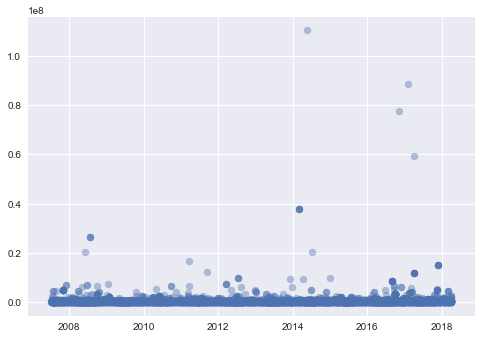

In [6]:
plt.scatter(dates, monies, alpha = .4)
plt.show()

In [7]:
data = pd.read_csv("Data USA Cart.csv")
data.head()

,geo_name,geo_sumlevel,geo_id,income_2013,income_2014,income_2015,income_2016,median_property_value_2013,median_property_value_2014,median_property_value_2015,median_property_value_2016
0,"Abanda, AL",place,16000US0100100,NaN,NaN,11207.0,NaN,NaN,NaN,NaN,NaN
1,"Abbeville, AL",place,16000US0100124,26500.0,27989.0,25615.0,28148.0,84600.0,77900.0,71600.0,77700.0
2,"Adamsville, AL",place,16000US0100460,45488.0,46005.0,42575.0,44833.0,99400.0,91900.0,95000.0,95300.0
3,"Addison, AL",place,16000US0100484,37917.0,38194.0,37083.0,34063.0,97000.0,94800.0,69300.0,67100.0
4,"Akron, AL",place,16000US0100676,23036.0,22813.0,21667.0,17344.0,61700.0,76400.0,72500.0,63300.0


In [8]:
data.dropna(axis=0, how='any', inplace = True)
data.head()

,geo_name,geo_sumlevel,geo_id,income_2013,income_2014,income_2015,income_2016,median_property_value_2013,median_property_value_2014,median_property_value_2015,median_property_value_2016
1,"Abbeville, AL",place,16000US0100124,26500.0,27989.0,25615.0,28148.0,84600.0,77900.0,71600.0,77700.0
2,"Adamsville, AL",place,16000US0100460,45488.0,46005.0,42575.0,44833.0,99400.0,91900.0,95000.0,95300.0
3,"Addison, AL",place,16000US0100484,37917.0,38194.0,37083.0,34063.0,97000.0,94800.0,69300.0,67100.0
4,"Akron, AL",place,16000US0100676,23036.0,22813.0,21667.0,17344.0,61700.0,76400.0,72500.0,63300.0
5,"Alabaster, AL",place,16000US0100820,70397.0,70173.0,71816.0,73325.0,162700.0,164200.0,165800.0,166300.0


In [9]:
#charlottesville numbers

inc2013 = 44601
inc2014 = 47218
inc2015 = 49775
inc2016 = 50727
med2013 = 293000
med2014 = 283100
med2015 = 285300
med2016 = 280100

inin = {'Income 2013':pd.Series([inc2013]), "Property Value 2013": pd.Series ([med2013]), 
        'Income 2014':pd.Series([inc2014]), "Property Value 2014": pd.Series ([med2014]), 
        'Income 2015':pd.Series([inc2015]), "Property Value 2015": pd.Series ([med2015]), 
        'Income 2016':pd.Series([inc2016]), "Property Value 2016": pd.Series ([med2016])}                           

charlottesvilleavg = pd.DataFrame(inin)

col = data.columns.tolist()
col = [col[3], col[7], col[4], col[8], col[5], col[9], col[6], col[10]]
data = data[col]

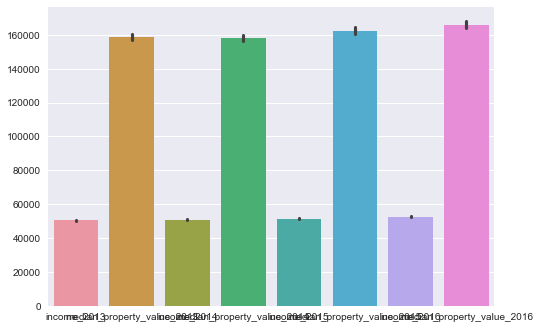

In [10]:
sns.barplot(data = data)
plt.show()

In [11]:
charlottesvilleavg.columns
mns = charlottesvilleavg.columns.tolist()
mns = [mns[0], mns[4], mns[1], mns[5], mns[2], mns[6], mns[3], mns[7]]
charlottesvilleavg = charlottesvilleavg[mns]

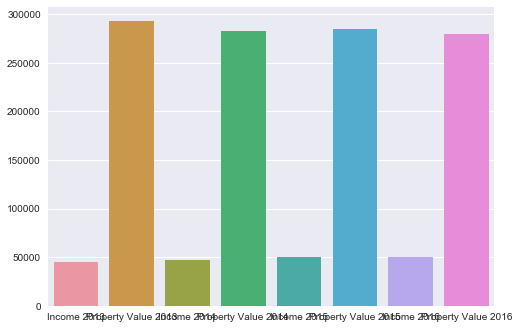

In [12]:
sns.barplot(data = charlottesvilleavg)
plt.show()

In [13]:
import folium

In [14]:
folium_map = folium.Map(location=[38.0293, -78.4767],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

In [15]:
base = pd.read_csv("Real_Estate_Base_Active.csv")
base.head()

,RecordID_Int,ParcelNumber,Address,StreetNumber,StreetName,Unit,StateCode,TaxType,Zone,TaxDist,Legal,Acreage,GPIN
0,1,010001000,1117 EMMET ST N,1117,EMMET ST N,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,39.832 ACRES BARRACKS ROAD SHOPPING CENTER,39.830,1326
1,2,010001100,1035-67 MILLMONT ST,1035-67,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,PARCEL W WEST BAR,2.140,15071
2,3,010001200,1159 MILLMONT ST,1159,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,LOT C-1 WEST BAR,0.580,1280
3,4,010001300,1135-37 MILLMONT ST,1135-37,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,LOT C-2B WEST BAR,0.400,1357
4,5,010001400,1111 MILLMONT ST,1111,MILLMONT ST,NaN,4.0 Commercial & Industrial,Taxable,URB,NaN,LOT B-1 WEST BAR,3.287,1366


In [16]:
for i in base["Address"]:
    base.replace(i, i + ", Charlottesville, VA")

KeyboardInterrupt: 

In [ ]:
import geocoder

In [ ]:
#will not load!!
for i in base["Address"]:
    g = geocoder.google(i)
    if g.latlng is None: 
        base.replace(i, np.nan, inplace = True)
        base.dropna(axis=0, how='any', inplace = True)
        is not None: 
        g = geocoder.mapquest(base["Address"], method='batch')
        lng = g.latlng[0]
        lat = g.latlng[1]
        folium.Marker([lng, lat]).add_to(folium_map)

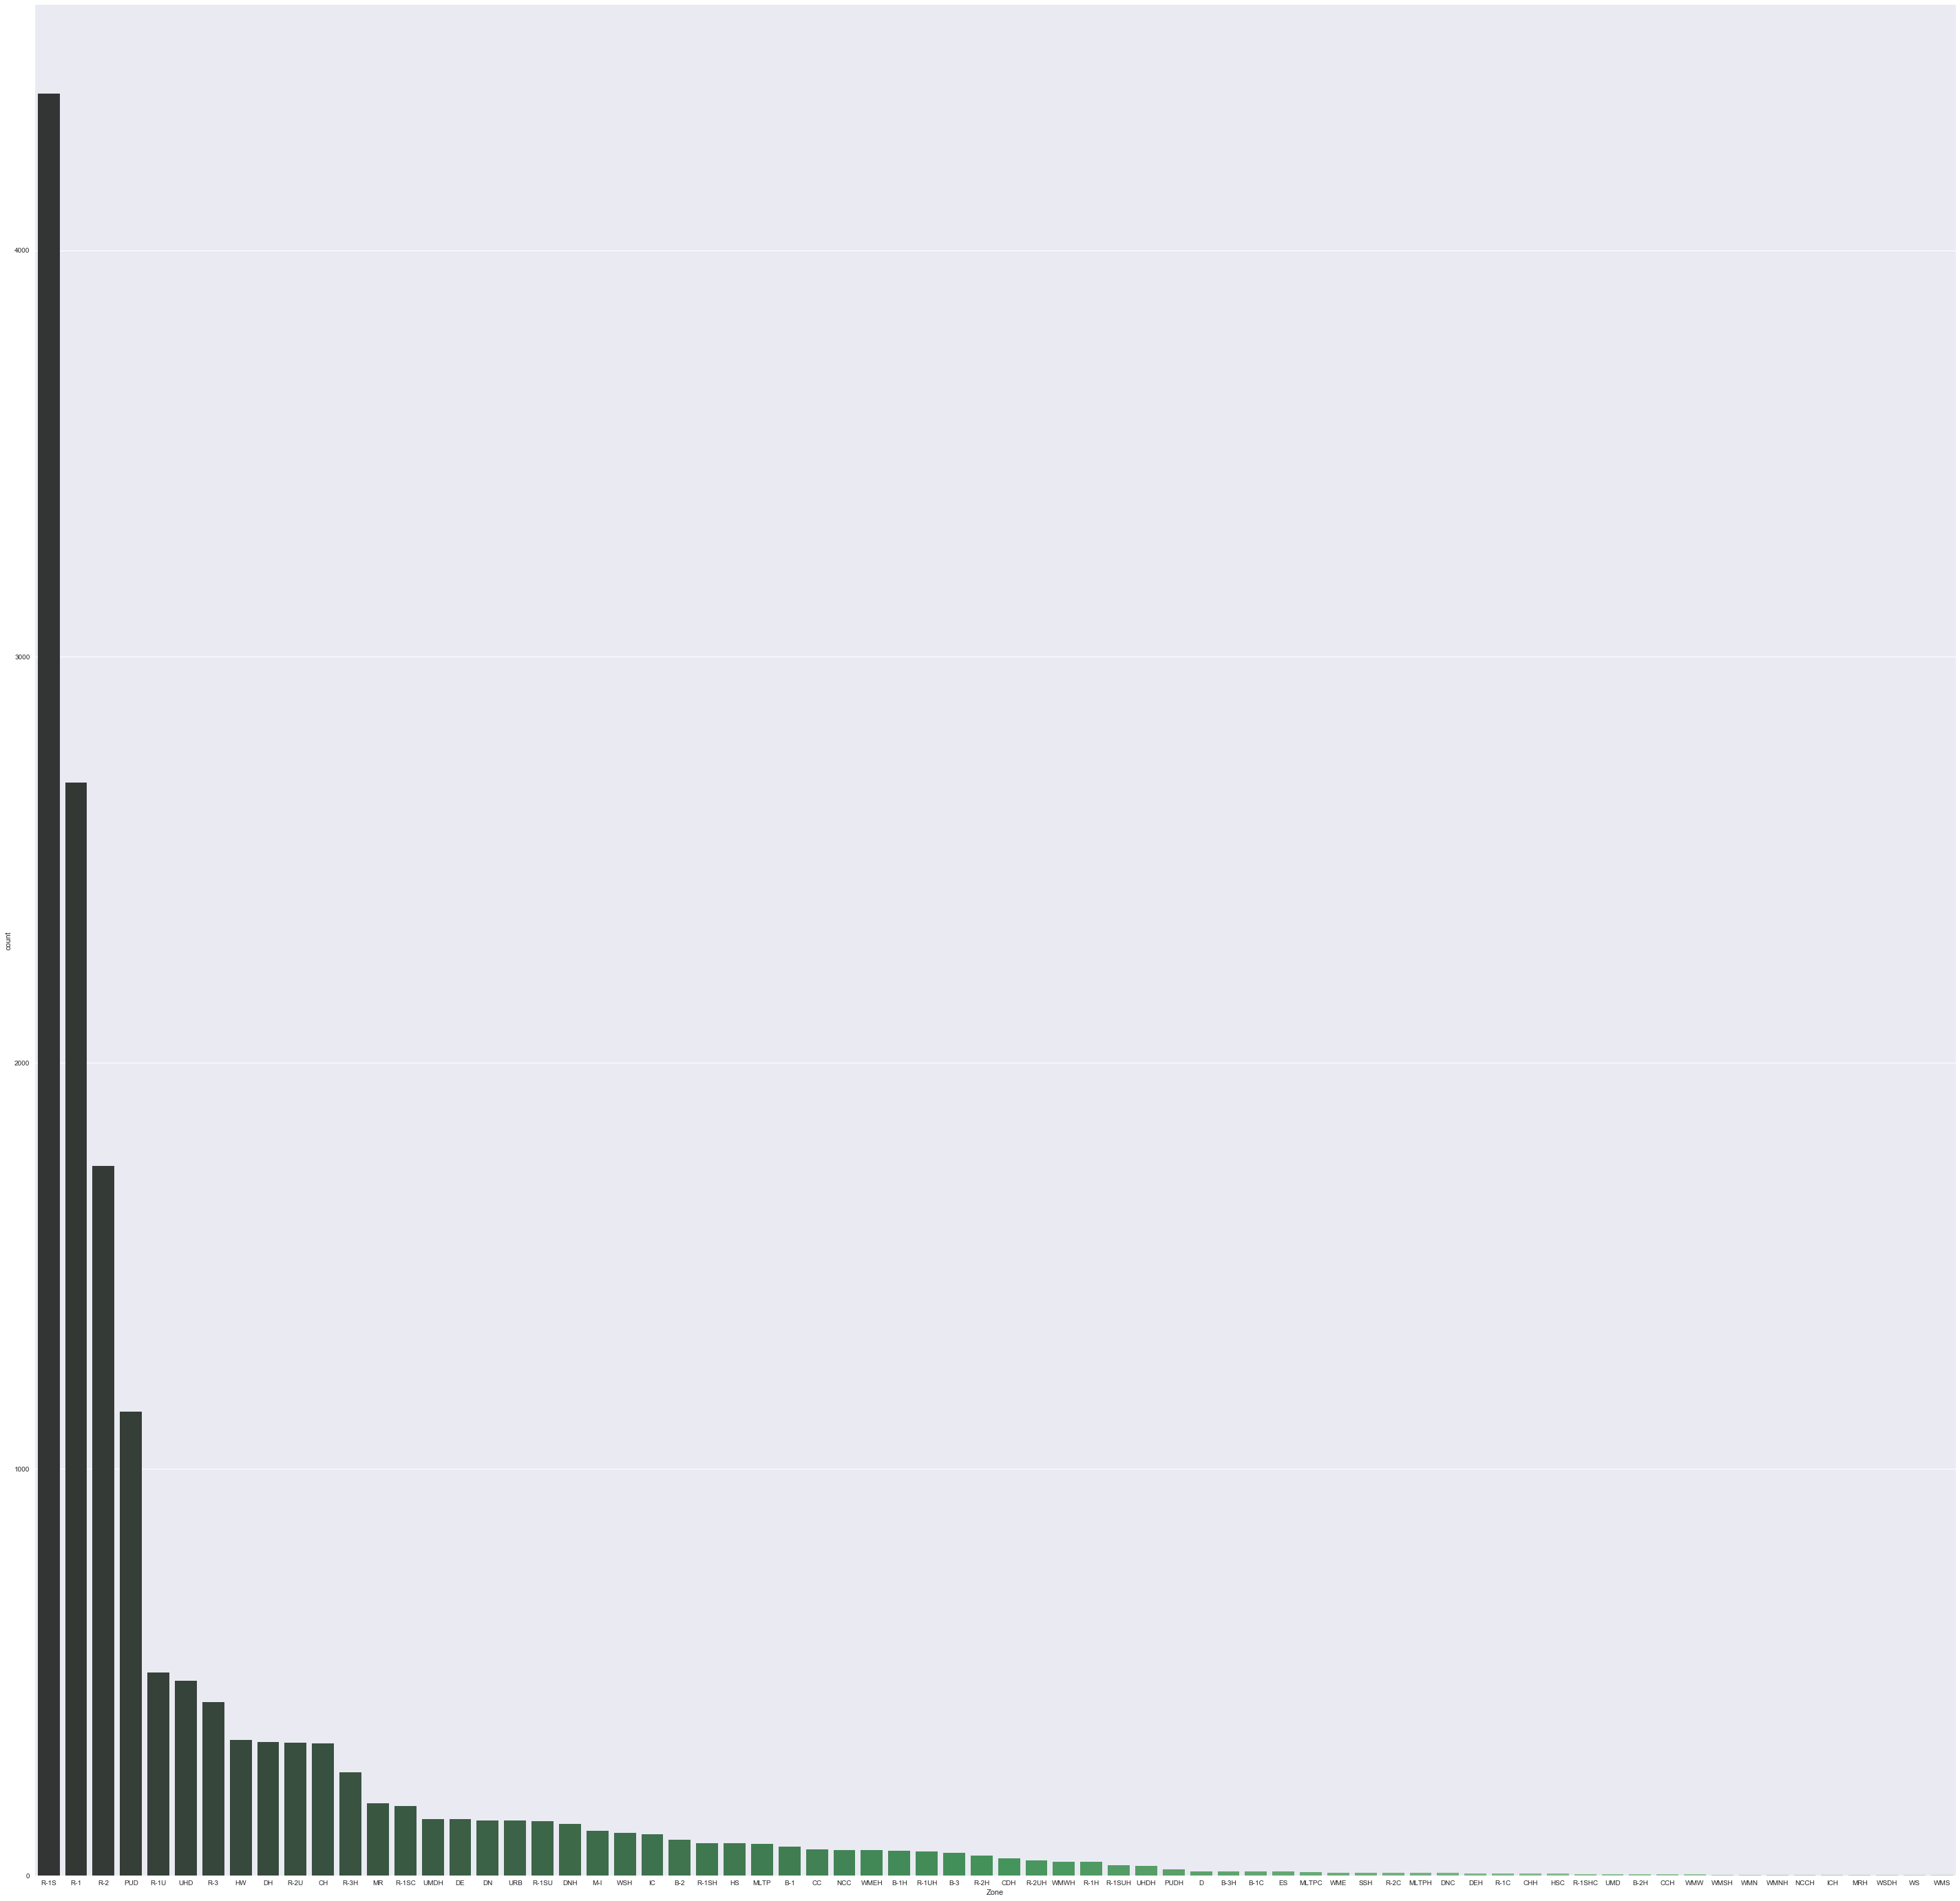

In [36]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(50, 50)
sns.countplot(x="Zone", data=base, palette="Greens_d", order = base['Zone'].value_counts().index);
plt.show()

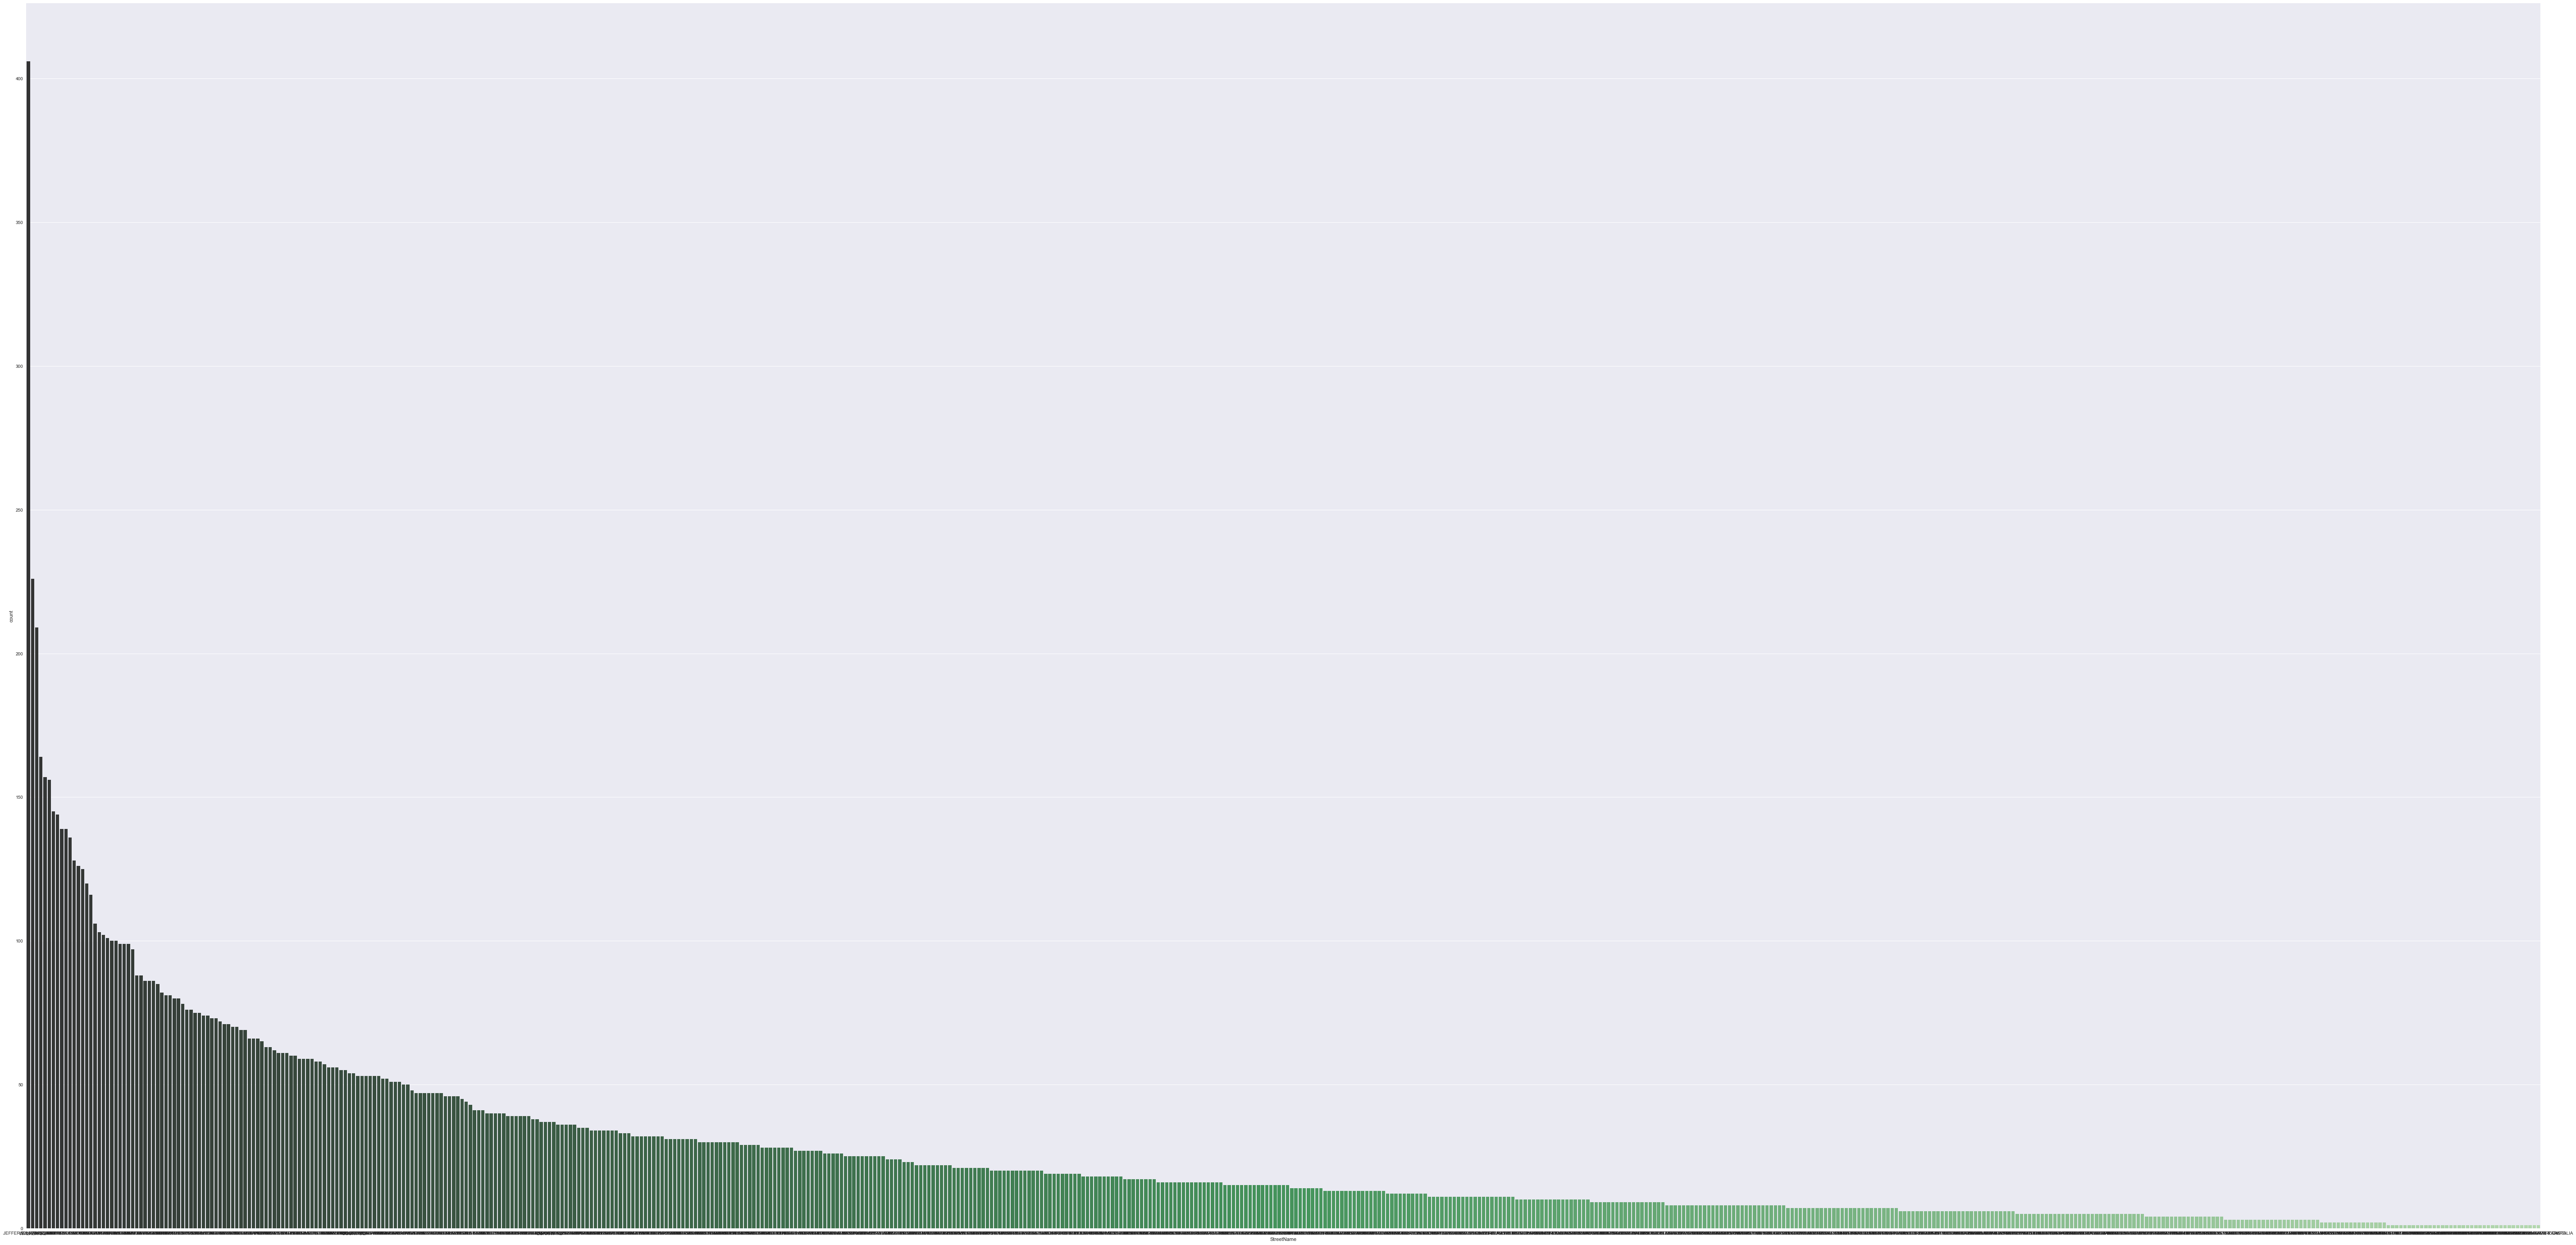

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(100, 50)
sns.countplot(x="StreetName", data=base, palette="Greens_d", order = base['StreetName'].value_counts().index);
plt.show()

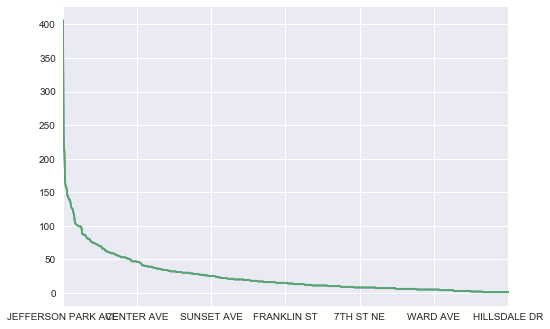

In [39]:
base['StreetName'].value_counts().plot()
plt.show()